# Porto Seguro’s Safe Driver Prediction


## Description

Predict if a driver will file an insurance claim next year.

https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/kernels

## Dataset

* input
    * train.csv
    * test.csv
    * sample_submission.csv

## Evaluation

Normalized Gini Coefficient

## Timeline

* November 29, 2017 - Final submission deadline.


In [9]:
import pandas as pd #pandas for using dataframe and reading csv 
from pandas_summary import DataFrameSummary
import numpy as np #numpy for vector operations and basic maths

import math #for basic maths operations
import seaborn as sns #for making plots
sns.set_style("whitegrid")

import matplotlib.pyplot as plt # for plotting
import matplotlib.ticker as ticker
%matplotlib inline

import tabulate # DataFrameからマークダウンのtableを生成するのに使用

In [26]:
train_df = pd.read_csv("./input/train.csv")
test_df = pd.read_csv("./input/test.csv")
sample_df = pd.read_csv("./input/sample_submission.csv")

In [27]:
sample_df.head()

,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364


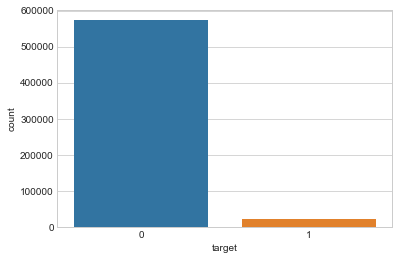

In [36]:
sns.countplot(train_df['target'])
plt.show()

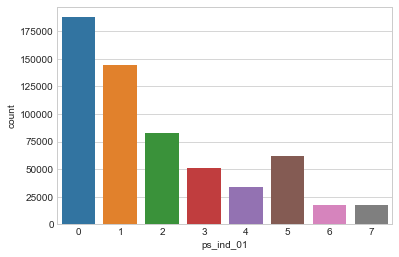

In [37]:
sns.countplot(train_df['ps_ind_01'])
plt.show()

In [19]:
train_summary = DataFrameSummary(train_df).summary()

In [20]:
train_summary.T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
id,595212,743804,429368,7,371992,743548,1.11555e+06,1.48803e+06,595212,595212,0,0%,numeric
target,595212,0.0364475,0.187401,0,0,0,0,1,595212,2,0,0%,bool
ps_ind_01,595212,1.90038,1.98379,0,0,1,3,7,595212,8,0,0%,numeric
ps_ind_02_cat,595212,1.35894,0.664594,-1,1,1,2,4,595212,5,0,0%,numeric
ps_ind_03,595212,4.42332,2.6999,0,2,4,6,11,595212,12,0,0%,numeric
ps_ind_04_cat,595212,0.416794,0.493311,-1,0,0,1,1,595212,3,0,0%,numeric
ps_ind_05_cat,595212,0.405188,1.35064,-1,0,0,0,6,595212,8,0,0%,numeric
ps_ind_06_bin,595212,0.393742,0.488579,0,0,0,1,1,595212,2,0,0%,bool
ps_ind_07_bin,595212,0.257033,0.436998,0,0,0,1,1,595212,2,0,0%,bool
ps_ind_08_bin,595212,0.163921,0.370205,0,0,0,0,1,595212,2,0,0%,bool


In [6]:
train_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [7]:
test_df.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [21]:
test_summary = DataFrameSummary(test_df).summary()

In [22]:
test_summary.T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
id,892816,744153,429683,0,372022,744307,1.11631e+06,1.48803e+06,892816,892816,0,0%,numeric
ps_ind_01,892816,1.90237,1.9865,0,0,1,3,7,892816,8,0,0%,numeric
ps_ind_02_cat,892816,1.35861,0.663002,-1,1,1,2,4,892816,5,0,0%,numeric
ps_ind_03,892816,4.41373,2.70015,0,2,4,6,11,892816,12,0,0%,numeric
ps_ind_04_cat,892816,0.417361,0.493453,-1,0,0,1,1,892816,3,0,0%,numeric
ps_ind_05_cat,892816,0.408132,1.35507,-1,0,0,0,6,892816,8,0,0%,numeric
ps_ind_06_bin,892816,0.393246,0.488471,0,0,0,1,1,892816,2,0,0%,bool
ps_ind_07_bin,892816,0.257191,0.437086,0,0,0,1,1,892816,2,0,0%,bool
ps_ind_08_bin,892816,0.163659,0.369966,0,0,0,0,1,892816,2,0,0%,bool
ps_ind_09_bin,892816,0.185905,0.38903,0,0,0,0,1,892816,2,0,0%,bool
